In [6]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Data Preparation and Visualization
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Define class names for visualization
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

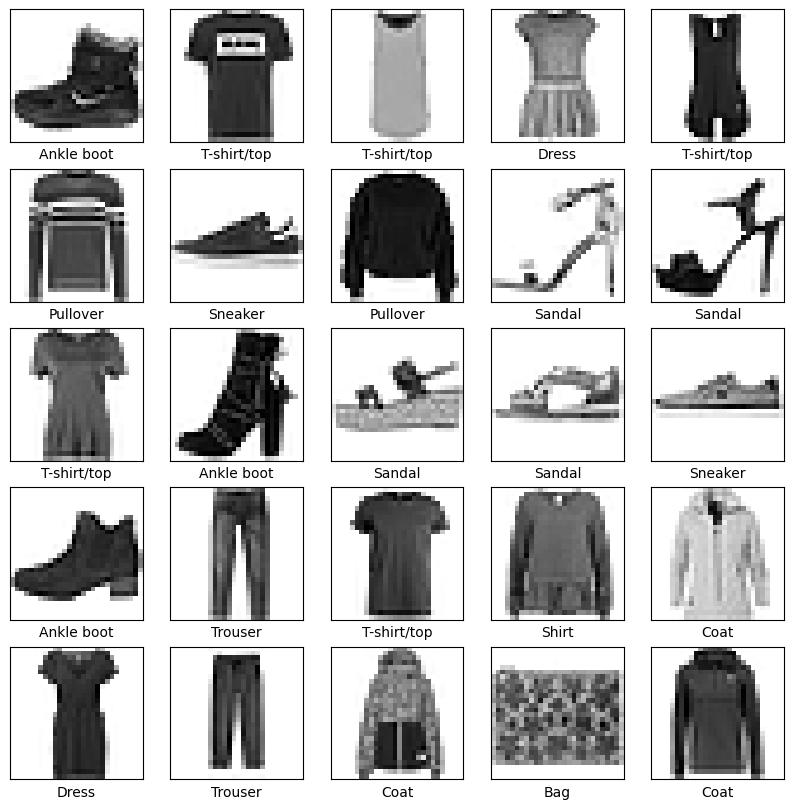

In [8]:
# Visualize 25 samples
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
# Normalize pixel values to [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Convert labels to categorical (one-hot encoding)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [10]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Input layer
    Dense(512, activation='relu'),  # Hidden layer 1
    Dense(256, activation='relu'),  # Hidden layer 2
    Dense(10, activation='softmax') # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Set up TensorBoard callback
tensorboard_callback = TensorBoard(log_dir='./logs')

# Train the model
history = model.fit(train_images, train_labels,
                    epochs=10,
                    validation_split=0.2,
                    callbacks=[tensorboard_callback])

# Model Evaluation and Analysis
# Evaluate on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Save the model
model.save('fashion_mnist_model.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.7863 - loss: 0.5980 - val_accuracy: 0.8615 - val_loss: 0.3826
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8642 - loss: 0.3673 - val_accuracy: 0.8659 - val_loss: 0.3670
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8772 - loss: 0.3242 - val_accuracy: 0.8691 - val_loss: 0.3593
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8899 - loss: 0.3016 - val_accuracy: 0.8853 - val_loss: 0.3217
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.8949 - loss: 0.2799 - val_accuracy: 0.8876 - val_loss: 0.3164
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8973 - loss: 0.2683 - val_accuracy: 0.8797 - val_loss: 0.3400
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9015 - loss: 0.2566 - val_accuracy: 0.8801 - val_loss: 0.3447
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9108 -


Test accuracy: 0.8787000179290771


In [11]:
# Model Loading and Verification
# Load the saved model
loaded_model = load_model('fashion_mnist_model.h5')

# Verify architecture and parameters
print("\nOriginal Model Summary:")
model.summary()
print("\nLoaded Model Summary:")
loaded_model.summary()


Original Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,607,456 (6.13 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,071,638 (4.09 MB)


Loaded Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,820 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

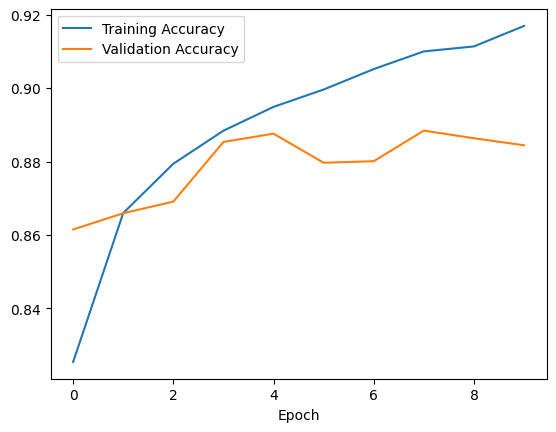

In [12]:
# Plot training vs validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()